<a href="https://colab.research.google.com/github/Thierno-dev/MachineLearningApprentissage/blob/main/tutoDeeplearnig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mise en place du deep learning, import des paquet tensor flow

In [34]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist #28x28 images ecrit entre 0 - 9

#Creation des variable d'entrainement
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#Normalisation des données
(X_train) = tf.keras.utils.normalize(X_train,axis=1)
(X_test) = tf.keras.utils.normalize(X_test,axis=1)

#Contrustion d'un modele de données
#Reseau convolutif adapte au traitement au traitement  d'image

model = tf.keras.models.Sequential()
#applatir le model
model.add(tf.keras.layers.Flatten())#C'est un reseau neuronal convolutif Flatten permet d'aplatir les données couche d'entree

#choix de deux couche caché
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))#1ere couche cache , avec le dense on passe le nombre de nombre de neuronne que l'on souhaite pour entrainer le modele puis la fonction d'activation:pas a pas, sigmoide, relu etc..
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))#2e couche cache
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))#couche de sortie, 10 concerne les valeur de sortie du model, et la focntion d'activation sera une probabilte de distribution avec softmax

#definition de quelque parametre pour former notre modele
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])#un modele deep minimise les pertes

#Passer a l'entrainement du model sur les donne
model.fit(X_train,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2648 - accuracy: 0.9217
Epoch 2/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1085 - accuracy: 0.9672
Epoch 3/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0744 - accuracy: 0.9763
Epoch 4/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0547 - accuracy: 0.9825
Epoch 5/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0411 - accuracy: 0.9871
Epoch 6/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0330 - accuracy: 0.9894


Importation de matplotlib pour la visualisation des

Evaluation du modele obtenu

In [36]:
val_loss, val_acc = model.evaluate(X_test,y_test)

val_loss, val_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0828 - accuracy: 0.9768


(0.08280392736196518, 0.9768000245094299)

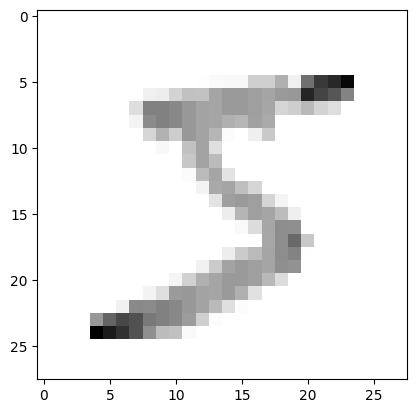

In [26]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0],cmap=plt.cm.binary)

plt.show()


Enregistrement pour l'utiliser plutard

In [37]:
model.save('epic_num_reader.model')

Creer un nouveau model

In [38]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

Predire de nouvelle donné

In [39]:
predictions = new_model.predict([X_test])

predictions

313/313 [==============================] - 1s 2ms/step


array([[8.87204699e-10, 8.78259865e-09, 2.20035226e-08, ...,
        9.99999702e-01, 1.28913005e-10, 3.19304605e-09],
       [2.32684878e-12, 3.06254356e-06, 9.99996603e-01, ...,
        1.56157118e-11, 1.99080405e-10, 1.36100144e-14],
       [8.60284066e-10, 9.99984562e-01, 4.52981332e-08, ...,
        3.11301051e-06, 1.05659956e-05, 2.34347421e-08],
       ...,
       [1.81430045e-12, 9.16472089e-08, 1.39932519e-11, ...,
        1.41223938e-06, 3.03312754e-06, 8.77487546e-05],
       [1.73617153e-07, 7.95869859e-09, 1.11596676e-09, ...,
        1.19817600e-09, 2.66506011e-03, 6.81914025e-10],
       [2.64352962e-09, 5.40439950e-11, 2.60421418e-09, ...,
        9.46080847e-14, 2.05353956e-09, 5.88366839e-14]], dtype=float32)

Afficher les valeur utiliser un numpy pour voir on peut tf avec le arc max

In [42]:
import numpy as np

np.argmax(predictions[1])

2

Pour le dessiner on a

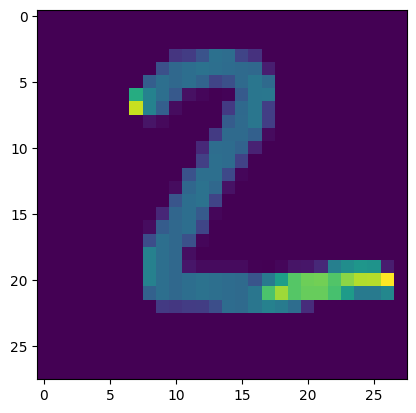

In [45]:
plt.imshow(X_test[1])
plt.show()